In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
import csv
with open('Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv','r') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=";")
    rawdata = [x for x in reader]
lig_MOLECULES = [Chem.MolFromSmiles(x['Smiles']) for x in rawdata]

Načtení erbB1

In [3]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [08:48:05] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [08:48:05] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [08:48:05] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [08:48:05] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [08:48:05] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [08:48:06] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:48:06] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [08:48:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:48:06] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [08:48:06] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [08:48:06] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [08:48:06] Can't kek

RDKit ERROR: [08:48:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [08:48:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:48:06] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [08:48:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:48:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [08:48:06] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [08:48:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [08:48:06] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [08:48:06] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [08:48:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [08:48:06] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [08:48:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:48:07] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [08:48:07] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [08:48:07] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [08:48:08] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [08:48:08] ERROR: Could not sanitize molecule ending on line 1151592


7113

Načtení drugbanku

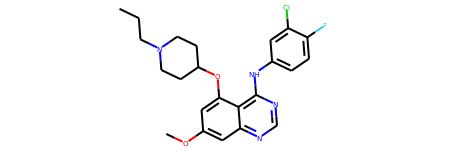

In [4]:
lig_MOLECULES[3344]

In [5]:
pyrimidine_pattern = Chem.MolFromSmiles('C1=CN=CN=C1')
lig_MOLECULES[3344].HasSubstructMatch(pyrimidine_pattern)

True

Jelikož jsem v minulých cvičeních zjistil, že v setu erbB1 mají látky vcelku vysoký počet cyklů, podíval jsem se rovnou na obsah pyrimidinové struktury v molekule.

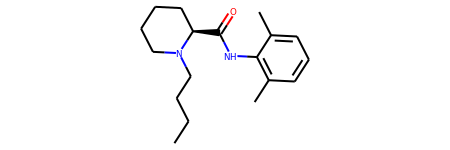

In [6]:
lig_MOLECULES[4400]

In [7]:
lig_MOLECULES[4400].HasSubstructMatch(pyrimidine_pattern)

False

In [8]:
import itertools
HitAtoms = lig_MOLECULES[3344].GetSubstructMatch(pyrimidine_pattern) # indices of matching atoms
HitBonds = [lig_MOLECULES[3344].GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(HitAtoms, 2)
             if lig_MOLECULES[3344].GetBondBetweenAtoms(i, j)]
HitAtoms, HitBonds

((28, 14, 15, 16, 17, 18), [32, 27, 14, 15, 16, 17])

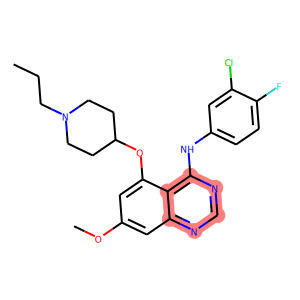

In [9]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
zobrazeni = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(zobrazeni, lig_MOLECULES[3344], highlightAtoms=HitAtoms, highlightBonds=HitBonds)
zobrazeni.FinishDrawing()
display(SVG(zobrazeni.GetDrawingText()))

Zvýraznění sledovaného strukturního znaku.

In [10]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def VisualizeMatch(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

Definice funkce

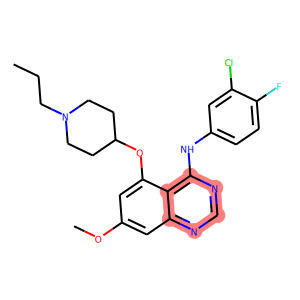

In [11]:
VisualizeMatch(lig_MOLECULES[3344],pyrimidine_pattern)

In [12]:
PyrimidineCounts_erbB1 = [len(x.GetSubstructMatches(pyrimidine_pattern)) for x in lig_MOLECULES]
PyrimidineCounts_erbB1_nonzero = [x for x in PyrimidineCounts_erbB1 if x]
len(PyrimidineCounts_erbB1), len(PyrimidineCounts_erbB1_nonzero), sum(PyrimidineCounts_erbB1_nonzero)/len(PyrimidineCounts_erbB1_nonzero), max(PyrimidineCounts_erbB1_nonzero)

(12496, 7882, 1.0117990357777213, 2)

Ha ha. Tak tohle vypadá na vcelku dobrou trefu. Cca 63 % látek ve své struktuře obsahují pyrimidin. Podívám se na drugbank.

In [13]:
PyrimidineCounts_drugbank = [len(x.GetSubstructMatches(pyrimidine_pattern)) for x in drugs]
PyrimidineCounts_drugbank_nonzero = [x for x in PyrimidineCounts_drugbank if x]
len(PyrimidineCounts_drugbank), len(PyrimidineCounts_drugbank_nonzero),\
sum(PyrimidineCounts_drugbank_nonzero)/len(PyrimidineCounts_drugbank_nonzero),\
max(PyrimidineCounts_drugbank_nonzero)

(7113, 931, 1.0558539205155746, 20)

No 13 %, vypadá to, že pro můj set by mohl být pyrimidinový pattern významný. Zajímavý je však maximální počet toho znaku v látce, který je v mém setu 2 a v drugbanku 20. Ovšem pyrimidinový skelet nalezneme u pyrimidinových i u purinových nuklebází, čili bych to tipoval na nějaký polynukleotid.

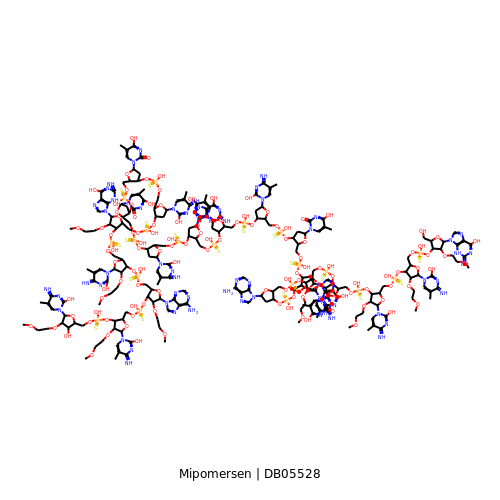

In [14]:
lots_of_pyrimidine = [x for x, i in zip(drugs, PyrimidineCounts_drugbank) if i == 20]
Draw.MolsToGridImage(lots_of_pyrimidine, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(x.GetProp('GENERIC_NAME'), x.GetProp('DRUGBANK_ID'))
                              for x in lots_of_pyrimidine])

Skutečně. Jedná se o léčivo MIPOMERSEN, které se používá pro léčbu homozygotní familiární hypercholesterolémie, vzácné genetické vady ovlivňující funkčnost genu pro LDL receptor. 

In [15]:
pyrazine_pattern = Chem.MolFromSmiles('C1=NC=CN=C1')
pyridazine_pattern = Chem.MolFromSmiles('C1=CC=CN=N1')

In [16]:
PyrazineCounts_erbB1 = [len(x.GetSubstructMatches(pyrazine_pattern)) for x in lig_MOLECULES]
PyrazineCounts_erbB1_nonzero = [x for x in PyrazineCounts_erbB1 if x]
len(PyrazineCounts_erbB1), len(PyrazineCounts_erbB1_nonzero), sum(PyrazineCounts_erbB1_nonzero)/len(PyrazineCounts_erbB1_nonzero)

(12496, 141, 1.0425531914893618)

In [17]:
PyridazineCounts_erbB1 = [len(x.GetSubstructMatches(pyridazine_pattern)) for x in lig_MOLECULES]
PyridazineCounts_erbB1_nonzero = [x for x in PyridazineCounts_erbB1 if x]
len(PyridazineCounts_erbB1), len(PyridazineCounts_erbB1_nonzero), sum(PyridazineCounts_erbB1_nonzero)/len(PyridazineCounts_erbB1_nonzero)

(12496, 70, 1.0)

Zkusil jsem se podívat ještě na další dvoudusíkáté heterocykly, ale tento vzor se již tak často v setu erbB1 nevyskytuje.

In [18]:
quinazoline_pattern = Chem.MolFromSmiles('C1=CC=C2C(=C1)C=NC=N2')
QuinazolineCounts_erbB1 = [len(x.GetSubstructMatches(quinazoline_pattern)) for x in lig_MOLECULES]
QuinazolineCounts_erbB1_nonzero = [x for x in QuinazolineCounts_erbB1 if x]
len(QuinazolineCounts_erbB1), len(QuinazolineCounts_erbB1_nonzero), sum(QuinazolineCounts_erbB1_nonzero)/len(QuinazolineCounts_erbB1_nonzero)

(12496, 3540, 1.0002824858757062)

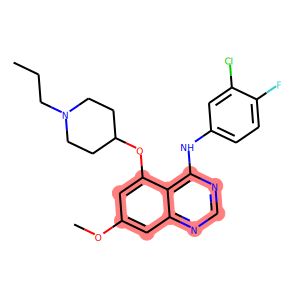

In [19]:
VisualizeMatch(lig_MOLECULES[3344],quinazoline_pattern)

Dále jsem se podíval na obsah bicyklu CHINAZOLINU a výsledek opět není špatný téměř 30 % látek takto objemného setu má tento vzor.

Teď zkusím podívat na obsah některých typických částí vzorů pro biomolekuly (peptid, sacharid, NK...)

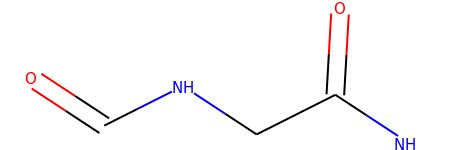

In [20]:
peptide_like_pattern = Chem.MolFromSmiles('C(=O)(CNC=O)N')
pyranose_like_pattern = Chem.MolFromSmiles('C1(C(C(C(CO1)O)O)O)CO')
furanose_like_pattern = Chem.MolFromSmiles('C1(C(CCO1)O)CO')
purine_pattern = Chem.MolFromSmiles('C1=C2C(=NC=N1)N=CN2')
peptide_like_pattern

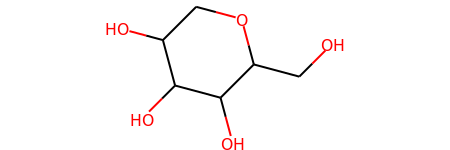

In [21]:
pyranose_like_pattern

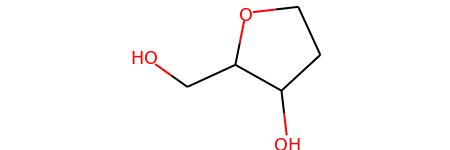

In [22]:
furanose_like_pattern

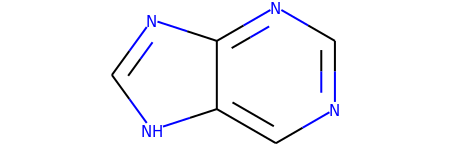

In [23]:
purine_pattern 

In [24]:
PeptidelikeCounts_erbB1 = [len(x.GetSubstructMatches(peptide_like_pattern)) for x in lig_MOLECULES]
PeptidelikeCounts_erbB1_nonzero = [x for x in PeptidelikeCounts_erbB1 if x]
pyranose_likeCounts_erbB1 = [len(x.GetSubstructMatches(pyranose_like_pattern)) for x in lig_MOLECULES]
pyranose_likeCounts_erbB1_nonzero = [x for x in pyranose_likeCounts_erbB1 if x]
furanose_likeCounts_erbB1 = [len(x.GetSubstructMatches(furanose_like_pattern)) for x in lig_MOLECULES]
furanose_likeCounts_erbB1_nonzero = [x for x in furanose_likeCounts_erbB1 if x]
purineCounts_erbB1 = [len(x.GetSubstructMatches(purine_pattern)) for x in lig_MOLECULES]
purineCounts_erbB1_nonzero = [x for x in purineCounts_erbB1 if x]
len(PeptidelikeCounts_erbB1), len(PeptidelikeCounts_erbB1_nonzero), len(pyranose_likeCounts_erbB1_nonzero), len(furanose_likeCounts_erbB1_nonzero), len(purineCounts_erbB1_nonzero), max(PeptidelikeCounts_erbB1_nonzero), max(pyranose_likeCounts_erbB1_nonzero), max(furanose_likeCounts_erbB1_nonzero), max(purineCounts_erbB1_nonzero)

(12496, 117, 49, 67, 229, 16, 8, 2, 2)

No molekul obsahujících vzor biologických molekul v tomto setu není mnoho, ale i přesto můžeme vidět, že tu můžeme najít nějaké peptidy a oligosacharidy

In [25]:
PeptidelikeCounts_drugbank = [len(x.GetSubstructMatches(peptide_like_pattern)) for x in drugs]
PeptidelikeCounts_drugbank_nonzero = [x for x in PeptidelikeCounts_drugbank if x]
pyranose_likeCounts_drugbank = [len(x.GetSubstructMatches(pyranose_like_pattern)) for x in drugs]
pyranose_likeCounts_drugbank_nonzero = [x for x in pyranose_likeCounts_drugbank if x]
furanose_likeCounts_drugbank = [len(x.GetSubstructMatches(furanose_like_pattern)) for x in drugs]
furanose_likeCounts_drugbank_nonzero = [x for x in furanose_likeCounts_drugbank if x]
purineCounts_drugbank = [len(x.GetSubstructMatches(purine_pattern)) for x in drugs]
purineCounts_drugbank_nonzero = [x for x in purineCounts_drugbank if x]
len(PeptidelikeCounts_drugbank), len(PeptidelikeCounts_drugbank_nonzero), len(pyranose_likeCounts_drugbank_nonzero), len(furanose_likeCounts_drugbank_nonzero), len(purineCounts_drugbank_nonzero), max(PeptidelikeCounts_drugbank_nonzero), max(pyranose_likeCounts_drugbank_nonzero), max(furanose_likeCounts_drugbank_nonzero), max(purineCounts_drugbank_nonzero)

(7113, 460, 197, 385, 334, 43, 7, 74, 6)

V drugbanku je situace o něco lepší. Dokonce tu už máme polypeptid látku obsahující 74 ribos. No tak pojďme na vizualizaci.

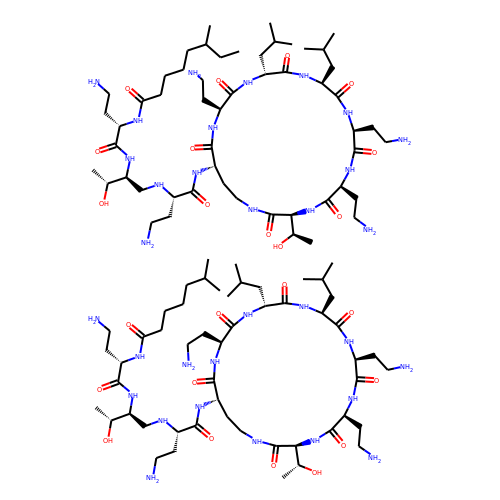

In [26]:
lots_of_peptide_motive_erbB1 = [x for x, i in zip(lig_MOLECULES, PeptidelikeCounts_erbB1) if i == 16]
Draw.MolsToGridImage(lots_of_peptide_motive_erbB1, molsPerRow=1, subImgSize=(500,500))

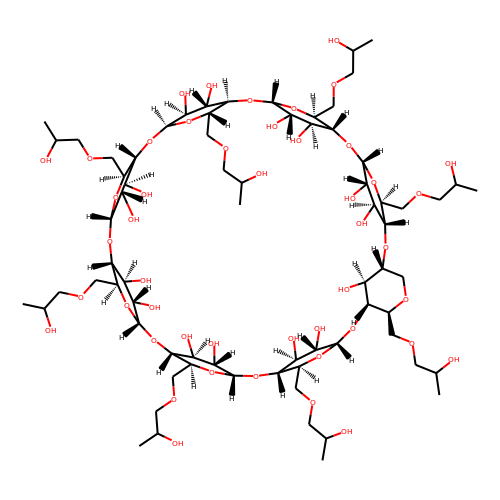

In [27]:
lots_of_pyranose_motive_erbB1 = [x for x, i in zip(lig_MOLECULES, pyranose_likeCounts_erbB1) if i == 8]
Draw.MolsToGridImage(lots_of_pyranose_motive_erbB1, molsPerRow=1, subImgSize=(500,500))

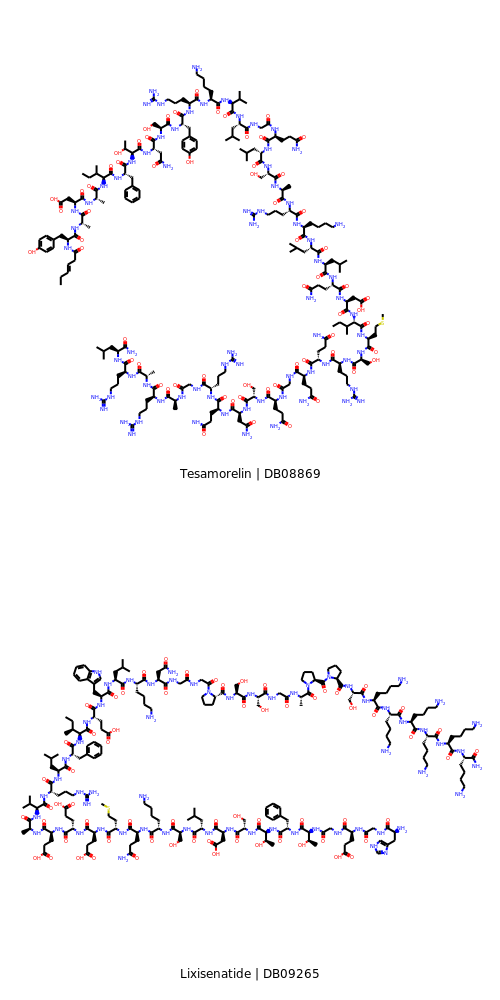

In [28]:
lots_of_peptide_motive_drugbank = [x for x, i in zip(drugs, PeptidelikeCounts_drugbank) if i == 43]
Draw.MolsToGridImage(lots_of_peptide_motive_drugbank, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(x.GetProp('GENERIC_NAME'), x.GetProp('DRUGBANK_ID'))
                              for x in lots_of_peptide_motive_drugbank])

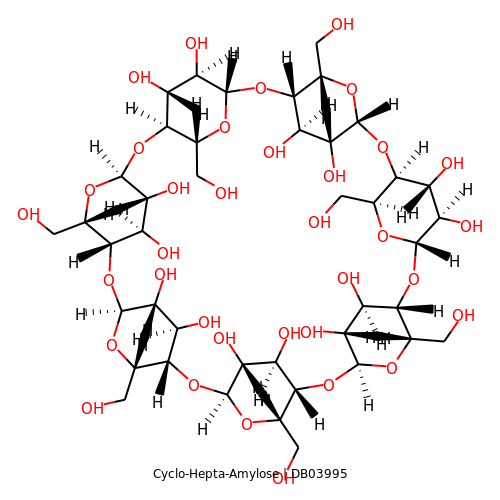

In [29]:
lots_of_pyranose_motive_drugbank = [x for x, i in zip(drugs, pyranose_likeCounts_drugbank) if i == 7]
Draw.MolsToGridImage(lots_of_pyranose_motive_drugbank, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(x.GetProp('GENERIC_NAME'), x.GetProp('DRUGBANK_ID'))
                              for x in lots_of_pyranose_motive_drugbank])

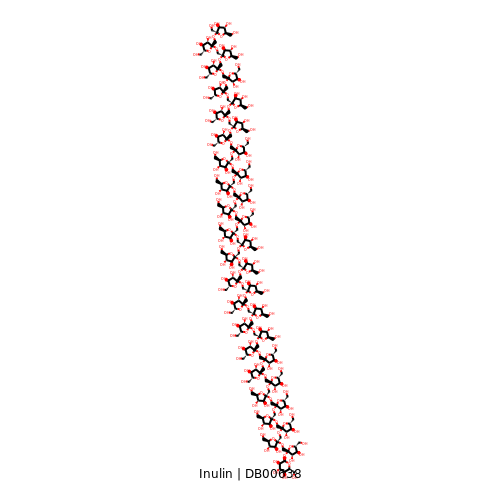

In [30]:
lots_of_furanose_motive_drugbank = [x for x, i in zip(drugs, furanose_likeCounts_drugbank) if i == 74]
Draw.MolsToGridImage(lots_of_furanose_motive_drugbank, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(x.GetProp('GENERIC_NAME'), x.GetProp('DRUGBANK_ID'))
                              for x in lots_of_furanose_motive_drugbank])

In [31]:
from itertools import chain
pains = []
with open('p_l15.txt', 'r') as f, open('p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t')
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")])
pains, len(pains)

([[<rdkit.Chem.rdchem.Mol at 0x7f7385730bc0>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730940>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730c10>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730c60>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730cb0>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730d50>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730d00>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730da0>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730df0>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730e40>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730e90>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730ee0>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730f30>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385730f80>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f7385727030>, '

Načtení setu vzorů PAINS

In [32]:
for x in lig_MOLECULES:
    x.pain_hits = [i for i, pain in enumerate(pains) if x.HasSubstructMatch(pain[0])]

erbB1_with_pains = [x for x in lig_MOLECULES if x.pain_hits]
erbB1_with_pains

In [33]:
len(erbB1_with_pains)

183

In [34]:
len(erbB1_with_pains)/len(lig_MOLECULES)

0.014644686299615878

Po vyčerpávajícím porovnání vzorů se strukturami v erbB1 setu jsem zjistil, že je zde 183 molekul s nějakým vzorem PAINS což činí 1.5 %. Na tak objemný set si myslím, že je to dobrý výsledek.

In [35]:
import pandas as pd
tabulka_pains = pd.DataFrame(columns=["ligand", "pain", "pain_pattern"])
for l in lig_MOLECULES:
    for p in pains:
        if l.HasSubstructMatch(p[0]):
            x = {"ligand": l, "pain": p[0], "pain_pattern": p[1]}
            tabulka_pains = tabulka_pains.append(x, ignore_index=True)
tabulka_pains

,ligand,pain,pain_pattern
0,<rdkit.Chem.rdchem.Mol object at 0x7f7385fa9ee0>,<rdkit.Chem.rdchem.Mol object at 0x7f7385717030>,azo_A(324)
1,<rdkit.Chem.rdchem.Mol object at 0x7f7385faac60>,<rdkit.Chem.rdchem.Mol object at 0x7f7385719f80>,quinone_A(370)
2,<rdkit.Chem.rdchem.Mol object at 0x7f7385f2f260>,<rdkit.Chem.rdchem.Mol object at 0x7f7385717030>,azo_A(324)
3,<rdkit.Chem.rdchem.Mol object at 0x7f7385f30e40>,<rdkit.Chem.rdchem.Mol object at 0x7f7385730cb0>,styrene_A(13)
4,<rdkit.Chem.rdchem.Mol object at 0x7f7385f33710>,<rdkit.Chem.rdchem.Mol object at 0x7f7385719f80>,quinone_A(370)
...,...,...,...
180,<rdkit.Chem.rdchem.Mol object at 0x7f7385e9ada0>,<rdkit.Chem.rdchem.Mol object at 0x7f7385717300>,imine_one_isatin(189)
181,<rdkit.Chem.rdchem.Mol object at 0x7f7385e9adf0>,<rdkit.Chem.rdchem.Mol object at 0x7f7385717300>,imine_one_isatin(189)
182,<rdkit.Chem.rdchem.Mol object at 0x7f7385e9ae40>,<rdkit.Chem.rdchem.Mol object at 0x7f7385717300>,imine_one_isatin(189)
183,<rdkit.Chem.rdchem.Mol object at 0x7f7385e9bb70>,<rdkit.Chem.rdchem.Mol object at 0x7f7385719f80>,quinone_A(370)


In [36]:
tabulka_pains["pain_pattern"].value_counts()

quinone_A(370)           80
azo_A(324)               50
anil_di_alk_B(251)       23
ne_rhod_A(235)            8
anil_di_alk_C(246)        8
imine_one_isatin(189)     6
anil_di_alk_D(198)        2
styrene_A(13)             2
ne_five_het_A(201)        2
keto_keto_beta_B(12)      2
imine_one_A(321)          1
steroid_A(2)              1
Name: pain_pattern, dtype: int64

Seznam vzorů pains, které se vyskytují v oněch 183 molekulách. Následuje jejich vizualizace.

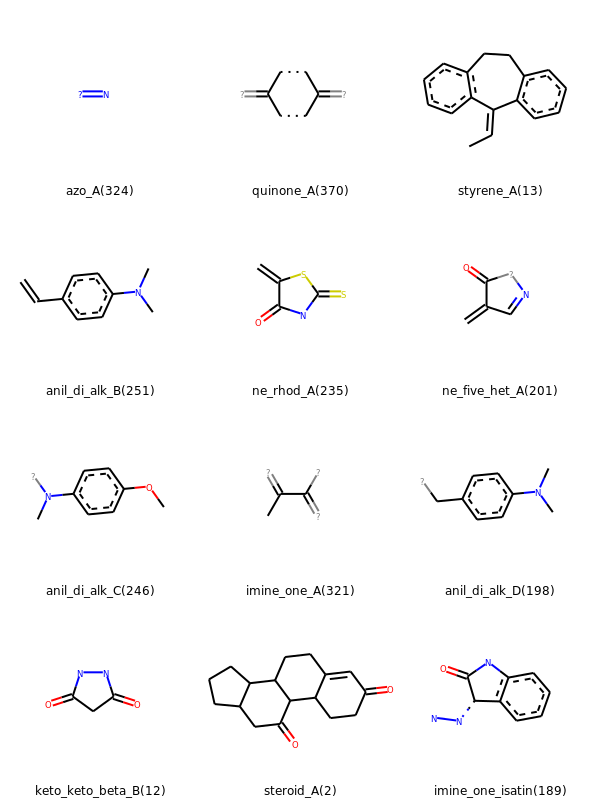

In [38]:
Draw.MolsToGridImage(tabulka_pains["pain"].unique().tolist(), molsPerRow=3, legends=tabulka_pains["pain_pattern"].unique().tolist())

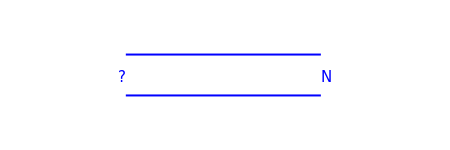

In [39]:
pains[erbB1_with_pains[0].pain_hits[0]][0]

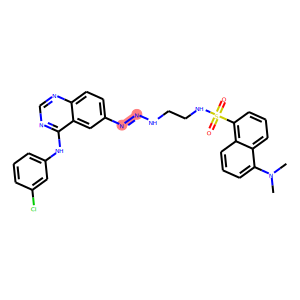

In [40]:
VisualizeMatch(erbB1_with_pains[0], pains[erbB1_with_pains[0].pain_hits[0]][0])

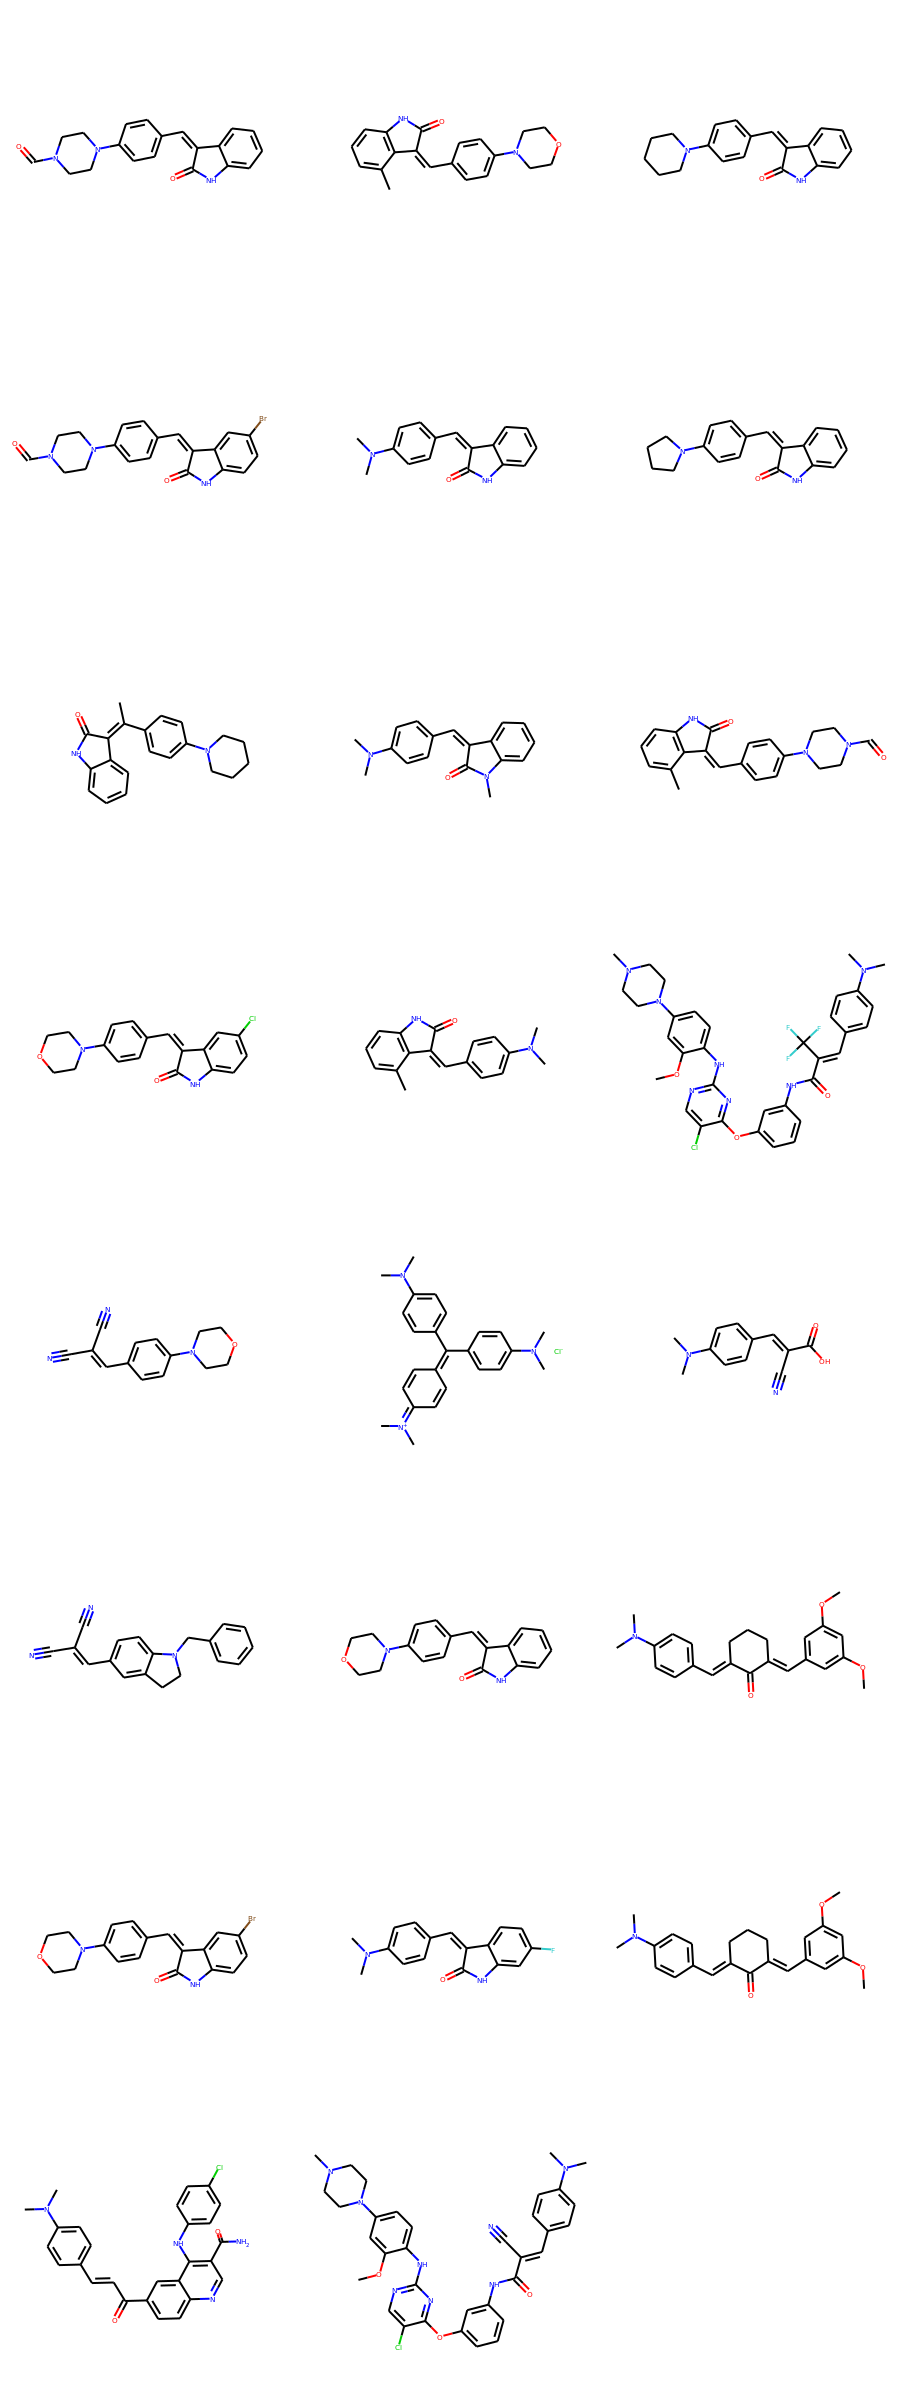

In [41]:
anil_di_alk_pattern = Chem.MolFromSmiles('C1(=CC=C(C=C1)C=C)N(C)C')
erbB1_anil_di_alk = [x for x in erbB1_with_pains if x.HasSubstructMatch(anil_di_alk_pattern)]
Draw.MolsToGridImage(erbB1_anil_di_alk, molsPerRow=3, subImgSize=(300,300))